In [1]:
#PHY 80 W23
#Lab 13: The Speed of Light (23/02/23-02/03/2023)
#Lab Partners: Ravi Kini, Sam Wu (Individual work of Ravi Kini)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy import optimize
from scipy.stats import binom, poisson, norm

See the handwritten logbook for entries.

### 13.1

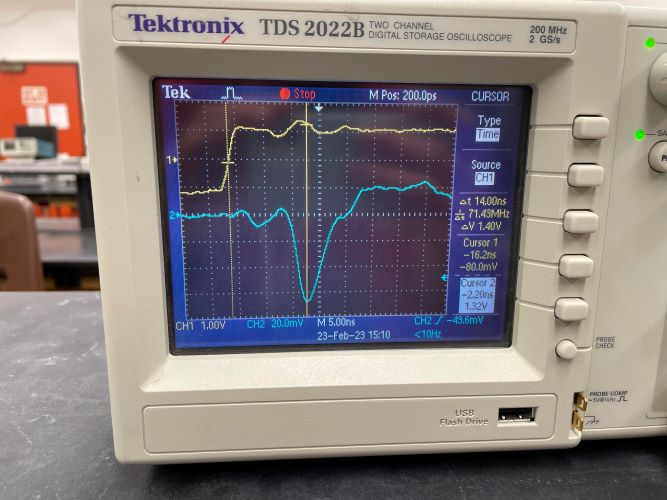

In [2]:
image = Image(filename='../img/phy80_lab13_1.jpg',height = 100)
display(image)
#measurement of a 14.00 ns time offset at a 0 cm distance

### 13.2

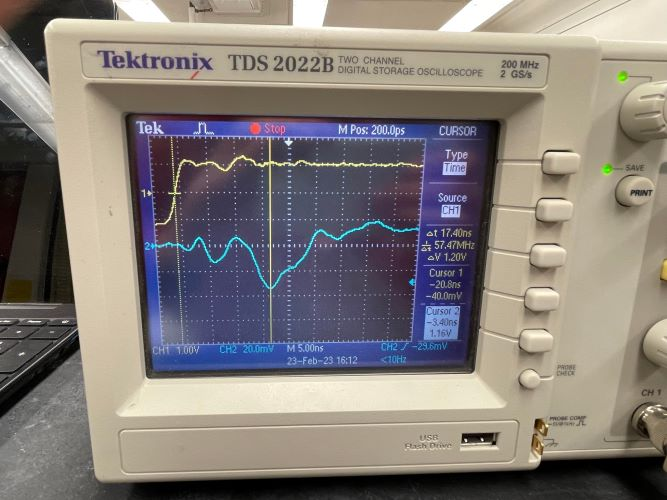

In [3]:
image = Image(filename='../img/phy80_lab13_2.jpg',height = 100)
display(image)
#measurement of a 17.40 ns time offset at a 97 cm distance

### 13.3

In [4]:
tr_to_mirror = np.array([20,40,60,80,100,120,140,160,180,200], np.float64)
delta_t = np.array([[13.00,13.20,13.20,13.00,13.00],[13.60,13.60,13.60,13.80,13.60],[15.20,15.60,15.80,15.40,15.00],[16.80,17.00,16.80,16.80,17.20],[17.60,17.00,17.00,17.40,17.20],[17.40,17.40,18.00,17.40,17.60],[18.80,19.00,18.80,19.00,19.20],[19.60,19.80,19.80,20.00,19.80],[20.40,20.20,20.20,20.60,20.40],[21.00,21.40,21.00,21.20,21.60]],np.float64) #time difference [ns]
delta_d = np.array([32,45,51,83,105,124,144,162,183,196], np.float64) #receiver-transmitter distance [cm]

print("trans to\ttime difference\t\t\t\t\tdistance")
print("mirror [cm]\tmean [ns]\tstat.unc [ns]\ttot.unc [ns]\tmean [cm]\tstat.unc [cm]\ttot.unc [cm]")
for i in range(len(tr_to_mirror)):
    print("{0}\t\t{1}\t\t{2}\t\t{3}\t\t{4}\t\t{5}\t\t{6}".format(tr_to_mirror[i], round(np.mean(delta_t[i]), 2), round(np.sqrt(np.var(delta_t[i])), 2), round(np.sqrt(np.var(delta_t[i]) + 0.2**2), 2), round(np.mean(delta_d[i]), 2), round(np.sqrt(np.var(delta_d[i])), 2), round(np.sqrt(np.var(delta_d[i]) + 1**2), 2)))
    #0.2 ns systematic uncertainty in oscilloscope cursor resolution
    #5 cm systematic uncertainty in ruler measurement

trans to	time difference					distance
mirror [cm]	mean [ns]	stat.unc [ns]	tot.unc [ns]	mean [cm]	stat.unc [cm]	tot.unc [cm]
20.0		13.08		0.1		0.22		32.0		0.0		1.0
40.0		13.64		0.08		0.22		45.0		0.0		1.0
60.0		15.4		0.28		0.35		51.0		0.0		1.0
80.0		16.92		0.16		0.26		83.0		0.0		1.0
100.0		17.24		0.23		0.31		105.0		0.0		1.0
120.0		17.56		0.23		0.31		124.0		0.0		1.0
140.0		18.96		0.15		0.25		144.0		0.0		1.0
160.0		19.8		0.13		0.24		162.0		0.0		1.0
180.0		20.36		0.15		0.25		183.0		0.0		1.0
200.0		21.24		0.23		0.31		196.0		0.0		1.0


### 13.4

In [5]:
print("trans to\ttime difference\t\tdistance")
print("mirror [cm]\tfr.unc\t\t\tfr.unc")
print("{0}\t\t{1}\t\t\t{2}".format(tr_to_mirror[0], round(np.sqrt(np.var(delta_t[0]) + 0.2**2)/np.mean(delta_t[i]), 3), 0))
for i in range(1,len(tr_to_mirror)):
    print("{0}\t\t{1}\t\t\t{2}".format(tr_to_mirror[i], round(np.sqrt(np.var(delta_t[i]) + 0.2**2)/np.mean(delta_t[i]), 3), round(np.sqrt(np.var(delta_d[i]) + 1**2)/np.mean(delta_d[i]), 3)))

trans to	time difference		distance
mirror [cm]	fr.unc			fr.unc
20.0		0.01			0
40.0		0.016			0.022
60.0		0.022			0.02
80.0		0.015			0.012
100.0		0.018			0.01
120.0		0.017			0.008
140.0		0.013			0.007
160.0		0.012			0.006
180.0		0.012			0.005
200.0		0.014			0.005


### 13.5

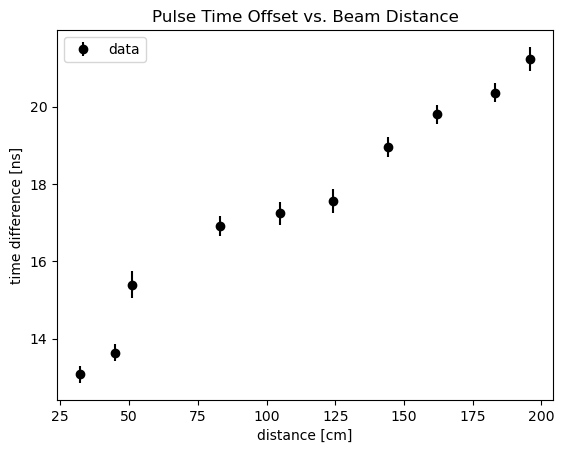

In [6]:
x_data = delta_d
y_data = np.mean(delta_t, axis=1)
y_unc = np.sqrt(np.var(delta_t, axis=1) + 0.2**2)

plt.errorbar(x_data, y_data, fmt="ko", yerr=y_unc, label="data")
plt.ylabel("time difference [ns]")
plt.xlabel("distance [cm]")
plt.title("Pulse Time Offset vs. Beam Distance")
plt.legend()
plt.show()

### 13.6

c (speed of light) [cm/ns]:  2.09e+01
uncertainty of c [cm/ns]:  1.43e-03
c (speed of light) [m/s]:  2.09e+08
uncertainty of c [m/s]:  1.43e+04


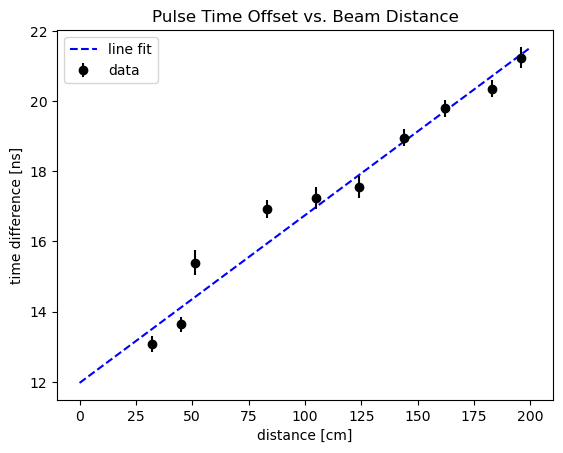

In [7]:
def line_func(x, a, b):
    return x * a + b
guess_a = 0.0
guess_b = 0.0
par, cov = optimize.curve_fit(line_func, x_data, y_data, sigma=y_unc, absolute_sigma=True, p0=[guess_a, guess_b])
unc = np.sqrt(np.diag(cov))


print("c (speed of light) [cm/ns]: ", f"{round(1/par[0], 5):.2e}")
print("uncertainty of c [cm/ns]: ", f"{round(unc[0], 5):.2e}")
print("c (speed of light) [m/s]: ", f"{round(10**7/par[0], 5):.2e}")
print("uncertainty of c [m/s]: ",f"{round(10**7*unc[0], 5):.2e}")

xf = np.linspace(0,200, 1000)
yf = par[1] + par[0] * xf
plt.plot(xf, yf, "b--", label="line fit")
plt.errorbar(x_data, y_data, fmt="ko", yerr=y_unc, label="data")
plt.ylabel("time difference [ns]")
plt.xlabel("distance [cm]")
plt.title("Pulse Time Offset vs. Beam Distance")
plt.legend()
plt.show()

### 13.7

In [8]:
chi_squared = np.sum(((line_func(x_data, par[0], par[1]) - y_data)/y_unc)**2)
print("chi squared value: ", round(chi_squared, 5))
print("reduced chi squared value: ", round(chi_squared/(len(x_data) - 2), 5))

chi squared value:  35.79604
reduced chi squared value:  4.4745


### 13.8

The meter is the distance traveled by light in 1/299792458 of a second (which is the time taken for 9192631770 hyperfine transitions from ground state for a Cs-133 atom), so the exact value of the speed of light in vacuum is 299792458 m/s.

### 13.9

In [9]:
print("our measured value lies within {0} sigmas of the known value".format((299792458 - 10**7/par[0])/(10**7*unc[0])))

our measured value lies within 6322.973270763393 sigmas of the known value


### 13.10

c (speed of light) [cm/ns]:  2.09e+01
uncertainty of c [cm/ns]:  3.03e-03
c (speed of light) [m/s]:  2.09e+08
uncertainty of c [m/s]:  3.03e+04


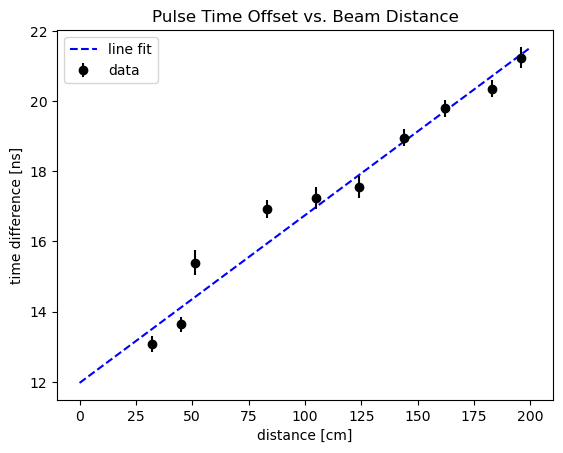

In [10]:
guess_a = 0.0
guess_b = 0.0
par, cov = optimize.curve_fit(line_func, x_data, y_data, sigma=y_unc, absolute_sigma=False, p0=[guess_a, guess_b])
unc = np.sqrt(np.diag(cov))


print("c (speed of light) [cm/ns]: ", f"{round(1/par[0], 5):.2e}")
print("uncertainty of c [cm/ns]: ", f"{round(unc[0], 5):.2e}")
print("c (speed of light) [m/s]: ", f"{round(10**7/par[0], 5):.2e}")
print("uncertainty of c [m/s]: ",f"{round(10**7*unc[0], 5):.2e}")

xf = np.linspace(0,200, 1000)
yf = par[1] + par[0] * xf
plt.plot(xf, yf, "b--", label="line fit")
plt.errorbar(x_data, y_data, fmt="ko", yerr=y_unc, label="data")
plt.ylabel("time difference [ns]")
plt.xlabel("distance [cm]")
plt.title("Pulse Time Offset vs. Beam Distance")
plt.legend()
plt.show()

### 13.11

In [11]:
print("our measured value lies within {0} sigmas of the known value".format((299792458 - 10**7/par[0])/(10**7*unc[0])))
#our measured value does not agree with the speed of light
#this may be due to the dimness of the laser, as we had to set the trigger very low
#this may have resulted in misidentifying noise as pulses

our measured value lies within 2989.1578958692553 sigmas of the known value


### 13.12

The intercept value is non-zero because there is a time difference even when the distance is zero, and represents the time offset between the measurements.

### 13.13

The lased LED light is pulsed so that pulses can use a large amount of energy in a short amount of time, resducing the power used while allowing for sufficiently high energytransfer, allowing us to measure a time difference between sending and receiving the pulse that cannot be done using a continuous wave.

### 13.14

In [12]:
print("the speed of light in air is", 299792458/1.0003)
print("there is a {0}% difference between the speed of light in vaccum and air".format(round((1 - 1/1.0003)*100, 5)))
#htis correction is not large enough to be relevant to our measurements

the speed of light in air is 299702547.23582923
there is a 0.02999% difference between the speed of light in vaccum and air
